## Name: Ziad Wael Abdl Hamed  ID: 20200211

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
x = np.arange(200)
delta = np.random.uniform(-50, 30, size=(200,))
y = .4 * x + 3 + delta

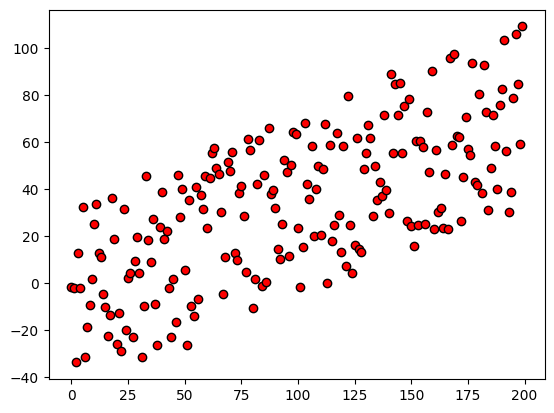

In [70]:
plt.scatter(x, y, color='red',edgecolors='black')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        y_pred = w * x[i] + b
        cost += (y_pred - y[i]) ** 2
    return cost / (2 * m)


In [53]:
w = 0
b = 0
learning_rate = 0.0001
cost_history = []
# Train model
for i in range(1000):
    # Compute gradients
    dw = 0
    db = 0
    for j in range(len(x_train)):
        y_pred = w * x_train[j] + b
        dw += (y_pred - y_train[j]) * x_train[j]
        db += y_pred - y_train[j]
    dw /= x_train.shape[0]
    db /= x_train.shape[0]
    
    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Compute cost and store it in history
    cost = compute_cost(x_train, y_train, w, b)
    cost_history.append(cost)
    
    # Print progress every 10 iterations
    if i % 10 == 0:
        print(f'Iteration {i}: cost={cost}, w={w}, b={b}')

print(f'Final: cost={cost}, w={w}, b={b}')


Iteration 0: cost=368.33032175387024, w=0.4679937445871003, b=0.003424361017668524
Iteration 10: cost=277.70857968825777, w=0.35135455070938065, b=0.0019879664589286744
Iteration 20: cost=277.70825637356336, w=0.3513568827416599, b=0.0014193777434100845
Iteration 30: cost=277.70793325286576, w=0.3513611110297981, b=0.0008509526677612449
Iteration 40: cost=277.7076103020969, w=0.3513653382368201, b=0.0002826770790186161
Iteration 50: cost=277.70728752116753, w=0.35136956433215494, b=-0.0002854490623599828
Iteration 60: cost=277.70696490998836, w=0.35137378931609453, b=-0.0008534257956768139
Iteration 70: cost=277.7066424684699, w=0.3513780131889311, b=-0.0014212531602238016
Iteration 80: cost=277.7063201965229, w=0.35138223595095686, b=-0.0019889311952825356
Iteration 90: cost=277.7059980940586, w=0.35138645760246395, b=-0.0025564599401242754
Final: cost=277.70570834667427, w=0.3513902561395682, b=-0.0030671081997956876


In [54]:
y_pred_test = w * x_test + b
mse_test = np.mean((y_pred_test - y_test) ** 2)
print(f'Testing MSE: {mse_test}')

Testing MSE: 440.6427633125065


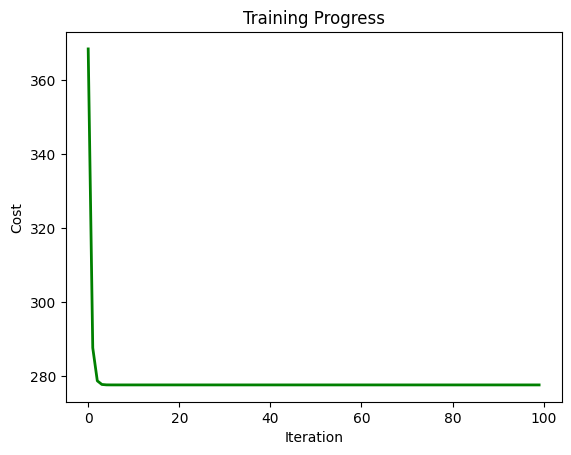

In [74]:
plt.plot(cost_history, color='green', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.show()

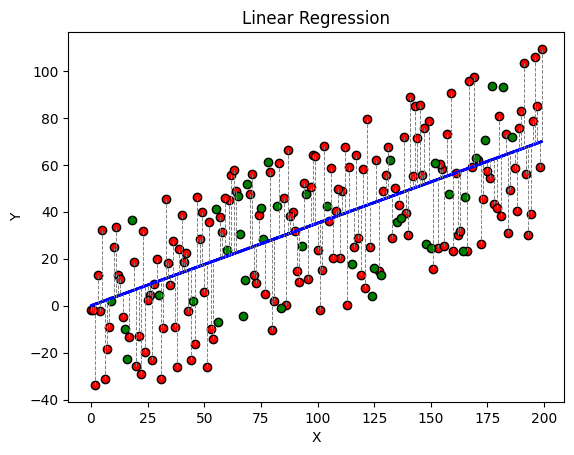

In [77]:
plt.scatter(x_train, y_train, color='red',edgecolors='black')
plt.scatter(x_test, y_test, color='green',edgecolors='black')
plt.plot(x_train, w * x_train + b, color='blue', linewidth=2)
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], w * x_train[i] + b], color='grey', linestyle='--', linewidth=0.7) #for the destance between the line and the point 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()